## ResNet (DNN) Example for Fashion MNIST Dataset

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


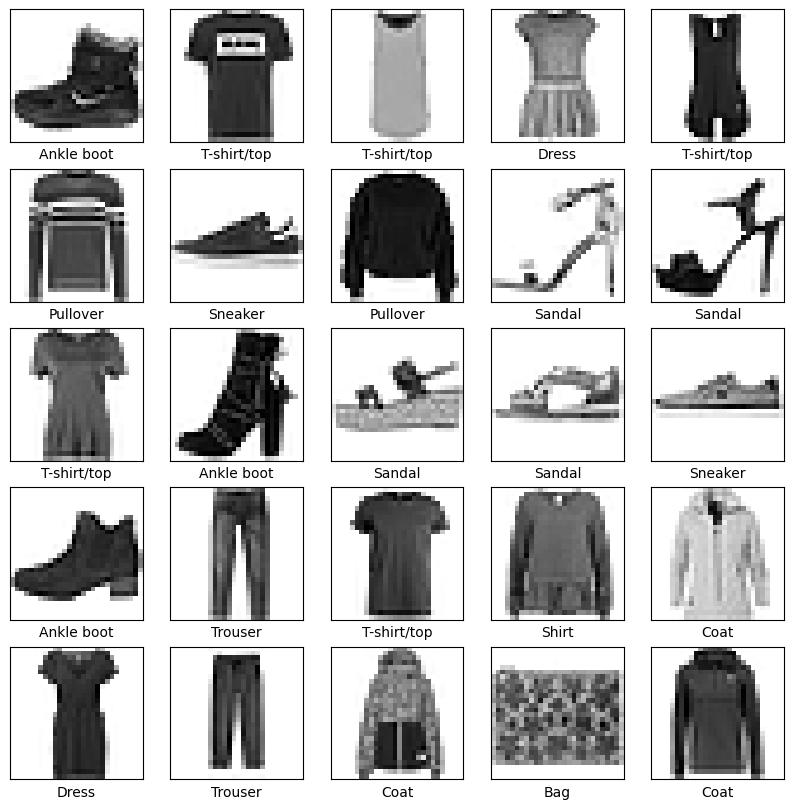

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Add, Activation, Flatten
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

In [2]:

from tensorflow.keras.layers import Dropout, BatchNormalization

def create_dnn():
    inputs = Input(shape=(784,))
    x = Dense(512)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)

    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)

    x = Dense(128)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)

    outputs = Dense(10, activation='softmax')(x)
    return Model(inputs, outputs)


In [3]:

def create_resnet_dnn():
    inputs = Input(shape=(784,))

    x = Dense(1024)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)

    shortcut1 = x
    x = Dense(1024)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(1024)(x)
    x = BatchNormalization()(x)
    x = Add()([shortcut1, x])
    x = Activation('relu')(x)

    shortcut2 = Dense(512)(x)
    x = Dense(512)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(512)(x)
    x = BatchNormalization()(x)
    x = Add()([shortcut2, x])
    x = Activation('relu')(x)

    shortcut3 = Dense(256)(x)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = Add()([shortcut3, x])
    x = Activation('relu')(x)

    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(10, activation='softmax')(x)

    return Model(inputs, outputs)


In [4]:
dnn_model = create_dnn()
resnet_model = create_resnet_dnn()

dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stop = EarlyStopping(patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_dnn_model.h5", save_best_only=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

dnn_history = dnn_model.fit(x_train_flat, y_train,
                            epochs=50,
                            batch_size=128,
                            validation_split=0.2,
                            callbacks=[early_stop, checkpoint, lr_scheduler],
                            verbose=1)


Epoch 1/50
372/375 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7253 - loss: 0.8047

375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.7261 - loss: 0.8024 - val_accuracy: 0.8558 - val_loss: 0.3968 - learning_rate: 0.0010
Epoch 2/50
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8437 - loss: 0.4317

375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.8437 - loss: 0.4316 - val_accuracy: 0.8611 - val_loss: 0.3784 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8632 - loss: 0.3791

375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.8632 - loss: 0.3791 - val_accuracy: 0.8777 - val_loss: 0.3419 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8726 - loss: 0.3510 - val_accuracy: 0.8688 - val_loss: 0.3534 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8817 - loss: 0.3210

375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.8816 - loss: 0.3210 - val_accuracy: 0.8781 - val_loss: 0.3411 - learning_rate: 0.0010
Epoch 6/50
373/375 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8841 - loss: 0.3151

375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8841 - loss: 0.3151 - val_accuracy: 0.8849 - val_loss: 0.3224 - learning_rate: 0.0010
Epoch 7/50
373/375 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8915 - loss: 0.2982

375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8915 - loss: 0.2983 - val_accuracy: 0.8824 - val_loss: 0.3220 - learning_rate: 0.0010
Epoch 8/50
373/375 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8911 - loss: 0.2891

375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8911 - loss: 0.2892 - val_accuracy: 0.8897 - val_loss: 0.3028 - learning_rate: 0.0010
Epoch 9/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.8958 - loss: 0.2847 - val_accuracy: 0.8698 - val_loss: 0.3602 - learning_rate: 0.0010
Epoch 10/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.8993 - loss: 0.2719 - val_accuracy: 0.8808 - val_loss: 0.3323 - learning_rate: 0.0010
Epoch 11/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9022 - loss: 0.2651 - val_accuracy: 0.8845 - val_loss: 0.3125 - learning_rate: 0.0010
Epoch 12/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9154 - loss: 0.2311

375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9154 - loss: 0.2311 - val_accuracy: 0.8982 - val_loss: 0.2834 - learning_rate: 5.0000e-04
Epoch 13/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9184 - loss: 0.2206 - val_accuracy: 0.8924 - val_loss: 0.3039 - learning_rate: 5.0000e-04
Epoch 14/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9183 - loss: 0.2202 - val_accuracy: 0.8873 - val_loss: 0.3113 - learning_rate: 5.0000e-04
Epoch 15/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9219 - loss: 0.2130 - val_accuracy: 0.8928 - val_loss: 0.2970 - learning_rate: 5.0000e-04
Epoch 16/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9274 - loss: 0.1964 - val_accuracy: 0.8995 - val_loss: 0.2841 - learning_rate: 2.5000e-04
Epoch 17/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9335 - loss: 0.1822

375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9335 - loss: 0.1822 - val_accuracy: 0.8992 - val_loss: 0.2822 - learning_rate: 2.5000e-04
Epoch 18/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9330 - loss: 0.1811 - val_accuracy: 0.9011 - val_loss: 0.2896 - learning_rate: 2.5000e-04
Epoch 19/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9371 - loss: 0.1716 - val_accuracy: 0.8985 - val_loss: 0.2925 - learning_rate: 2.5000e-04
Epoch 20/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9352 - loss: 0.1725 - val_accuracy: 0.9019 - val_loss: 0.2896 - learning_rate: 2.5000e-04
Epoch 21/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9375 - loss: 0.1675 - val_accuracy: 0.9029 - val_loss: 0.2835 - learning_rate: 1.2500e-04
Epoch 22/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9422 - loss: 0.1571 - val_accuracy: 0.9032 - val_loss: 0.2855 - learning_rate: 1.2500e-04


In [6]:
resnet_model = create_resnet_dnn()
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

resnet_history = resnet_model.fit(x_train_flat, y_train,
                                  epochs=50,
                                  batch_size=128,
                                  validation_split=0.2,
                                  callbacks=[early_stop, checkpoint, lr_scheduler],
                                  verbose=1)


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 58s 137ms/step - accuracy: 0.6991 - loss: 0.8554 - val_accuracy: 0.8328 - val_loss: 0.4629 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 139ms/step - accuracy: 0.8294 - loss: 0.4723 - val_accuracy: 0.8487 - val_loss: 0.4138 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 80s 134ms/step - accuracy: 0.8494 - loss: 0.4182 - val_accuracy: 0.8540 - val_loss: 0.4012 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 50s 134ms/step - accuracy: 0.8605 - loss: 0.3877 - val_accuracy: 0.8631 - val_loss: 0.3860 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 131ms/step - accuracy: 0.8649 - loss: 0.3684 - val_accuracy: 0.8701 - val_loss: 0.3615 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 83s 134ms/step - accuracy: 0.8768 - loss: 0.3470 - val_accuracy: 0.8709 - val_loss: 0.3523 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 50s 133ms/step - accuracy: 0.8

In [7]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

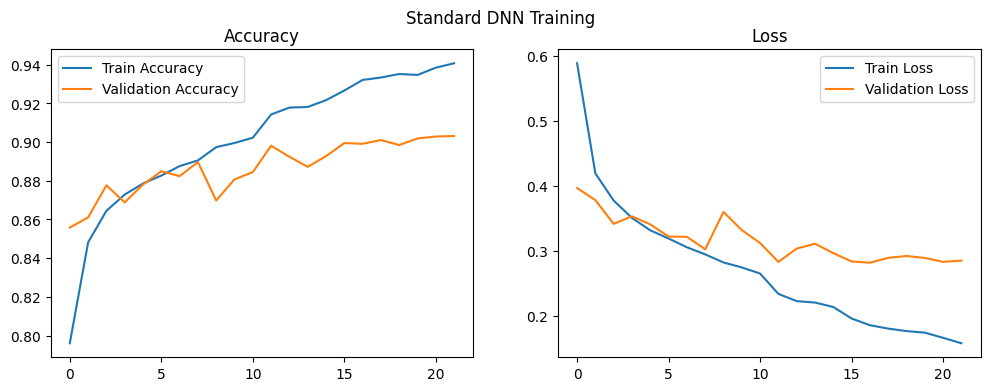

In [8]:
plot_history(dnn_history, 'Standard DNN Training')

In [9]:
dnn_test_loss, dnn_test_acc = dnn_model.evaluate(x_test_flat, y_test, verbose=0)
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(x_test_flat, y_test, verbose=0)

In [10]:
print(f"Standard DNN Test Accuracy: {dnn_test_acc:.4f}")
print(f"ResNet-style DNN Test Accuracy: {resnet_test_acc:.4f}")

Standard DNN Test Accuracy: 0.8930
ResNet-style DNN Test Accuracy: 0.8861



Standard DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


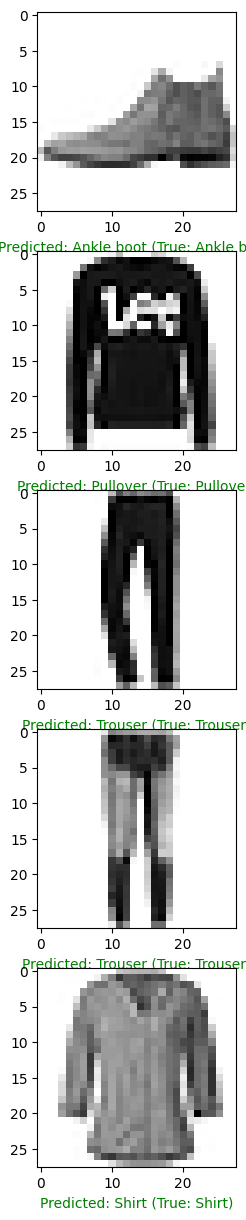


ResNet-style DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


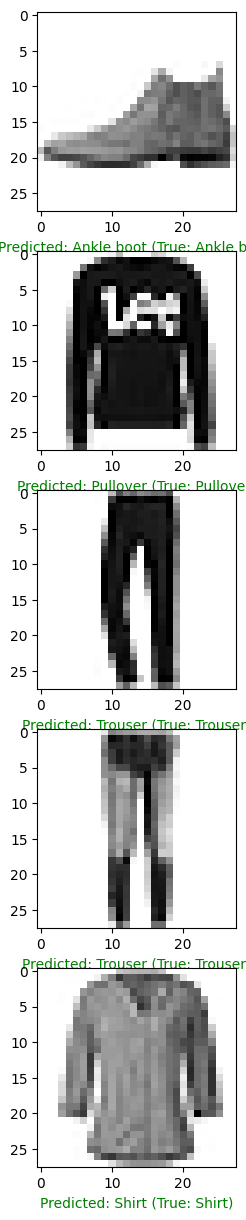

In [11]:
def plot_predictions(model, x_test, y_test, num_images=5):
    predictions = model.predict(x_test)
    plt.figure(figsize=(15, 3*num_images))
    for i in range(num_images):
        plt.subplot(num_images, 1, i+1)
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
        pred_label = np.argmax(predictions[i])
        true_label = np.argmax(y_test[i])
        color = 'green' if pred_label == true_label else 'red'
        plt.xlabel(f"Predicted: {class_names[pred_label]} (True: {class_names[true_label]})", color=color)
    plt.show()

print("\nStandard DNN Predictions:")
plot_predictions(dnn_model, x_test_flat, y_test)

print("\nResNet-style DNN Predictions:")
plot_predictions(resnet_model, x_test_flat, y_test)